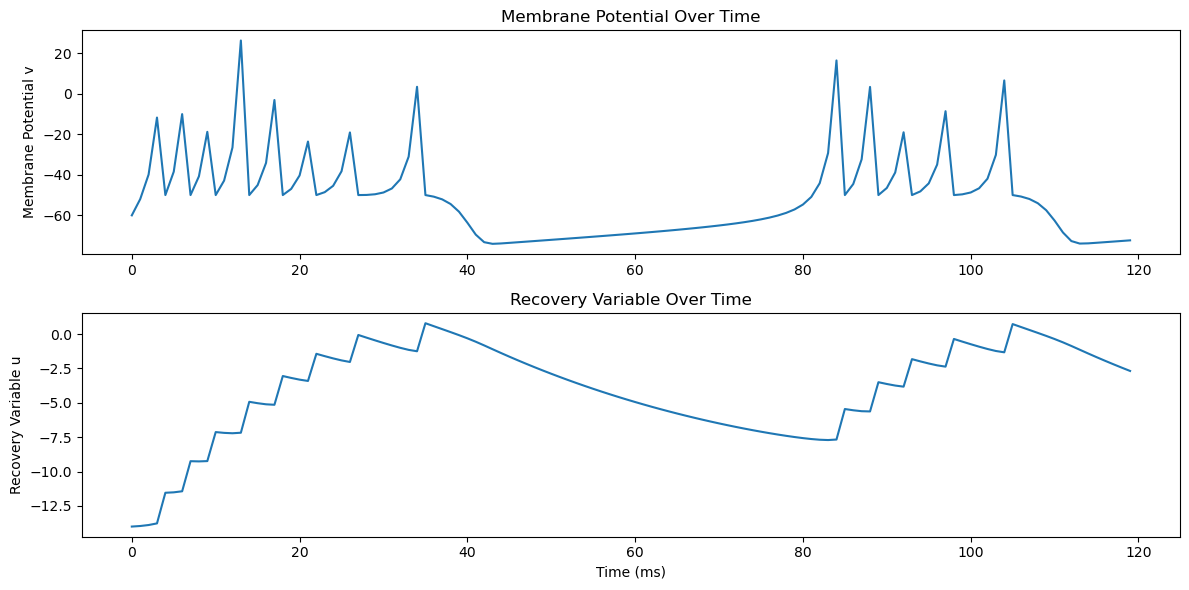

In [148]:
# Parameters for the Izhikevich neuron
a, b, c, d = 0.02, 0.2, -50, 2
I = 10  # Example constant input current

v = -70  # Initial membrane potential
u = b * v  # Initial recovery variable

T = 120  # Total time to simulate
dt = 1  # Time step

V = []
U = []

for t in range(int(T / dt)):
    dv = 0.04 * v**2 + 5 * v + 140 - u + I
    du = a * (b * v - u)

    v += dv * dt
    u += du * dt

    if v >= 30:
        v = c
        u += d

    # Append the current state to the lists
    V.append(v)
    U.append(u)

# Assuming matplotlib is installed, you could plot the results like this:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.title("Membrane Potential Over Time")
plt.ylabel("Membrane Potential v")
plt.plot([i * dt for i in range(int(T / dt))], V)

plt.subplot(212)
plt.title("Recovery Variable Over Time")
plt.xlabel("Time (ms)")
plt.ylabel("Recovery Variable u")
plt.plot([i * dt for i in range(int(T / dt))], U)
plt.tight_layout()
plt.show()


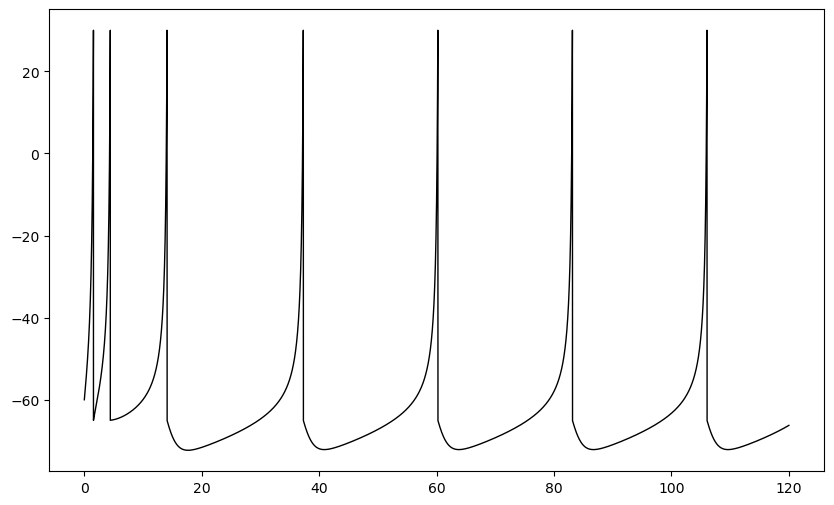

In [175]:
import numpy as np
import matplotlib.pyplot as plt

# Izhikevich neuron parameters
a, b, c, d = 0.02, 0.2, -65, 8
v_reset = -60
v_threshold = 30

# Simulation parameters
dt = 0.001  # larger time step (ms)
time = np.arange(0, 120, dt)  # simulation time (ms)
I = 20  # input current (constant)

# Initialize variables
v = np.zeros(len(time))
u = np.zeros(len(time))
v[0] = v_reset
u[0] = b * v_reset

# Function to compute the derivatives
def derivatives(v, u, I):
    dvdt = 0.04 * v**2 + 5 * v + 140 - u + I
    dudt = a * (b * v - u)
    return dvdt, dudt

# RK4 method implementation
for t in range(1, len(time)):
    v_n, u_n = v[t-1], u[t-1]
    
    k1_v, k1_u = derivatives(v_n, u_n, I)
    k2_v, k2_u = derivatives(v_n + dt/2 * k1_v, u_n + dt/2 * k1_u, I)
    k3_v, k3_u = derivatives(v_n + dt/2 * k2_v, u_n + dt/2 * k2_u, I)
    k4_v, k4_u = derivatives(v_n + dt * k3_v, u_n + dt * k3_u, I)
    
    v[t] = v_n + dt/6 * (k1_v + 2*k2_v + 2*k3_v + k4_v)
    u[t] = u_n + dt/6 * (k1_u + 2*k2_u + 2*k3_u + k4_u)
    
    # Check for spike
    if v[t] >= v_threshold:
        v[t-1] = v_threshold  # Set previous step to threshold for plotting
        v[t] = c
        u[t] += d

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(time, v, c='black', lw=1)
#plt.axis('off')
plt.show()


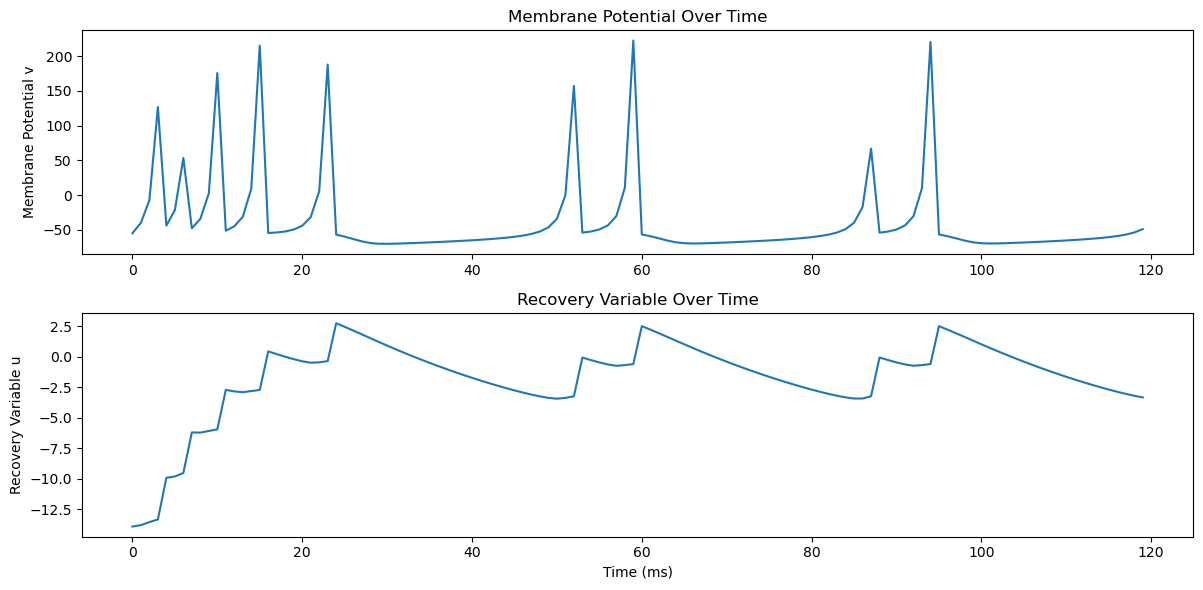

In [340]:
# Parameters for the Izhikevich neuron
#a, b, c, d = 0.055, 0.40, -55, 2
a, b, c, d = 0.02, 0.2, -55, 3
#a, b, c, d = 0.02, 1, -65, 2
I = 15  # Example constant input current
# I_var = np.random.normal(15, 2, int(T / dt))  # Example random input current
# mask = np.random.randint(0, 2, int(T / dt))
#I = I_var*mask
v = -70  # Initial membrane potential
u = b * v  # Initial recovery variable

T = 120  # Total time to simulate
dt = 1  # Time step

V = []
U = []
val_ = []

for t in range(int(T / dt)):
    v_prev = v
    v += dt*(0.04 * v**2 + 5 * v + 140 - u + I)

    if v >= 30:
        t_peak = t + (30-v_prev)/(v-v_prev) 
        val = t_peak - t
        u += val*(a * (b * v - u))
    else:
        u += dt*(a * (b * v - u))

    V.append(v)
    U.append(u)

    if v >= 30:
        v = c
        u += d



# Assuming matplotlib is installed, you could plot the results like this:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.title("Membrane Potential Over Time")
plt.ylabel("Membrane Potential v")
plt.plot([i * dt for i in range(int(T / dt))], V)

plt.subplot(212)
plt.title("Recovery Variable Over Time")
plt.xlabel("Time (ms)")
plt.ylabel("Recovery Variable u")
plt.plot([i * dt for i in range(int(T / dt))], U)
plt.tight_layout()
plt.show()

In [316]:
neuron_parm_dict = {
    'ffs': {'a': 0.1, 'b': 0.2, 'c': -65, 'd': 8},
    'ibfs': {'a': 0.02, 'b': 1, 'c': -65, 'd': 8},
    'ibvfs': {'a': 0.02, 'b': 1, 'c': -65, 'd': 2},
    'ms': {'a': 0.03, 'b': 0.2, 'c': -65, 'd': 8},
    'mch': {'a': 0.05, 'b': 0.2, 'c': -50, 'd': 4},
    'rs': {'a': 0.02, 'b': 0.2, 'c': -65, 'd': 8},
    'ib': {'a': 0.02, 'b': 0.2, 'c': -55, 'd': 4},
    'ch': {'a': 0.02, 'b': 0.2, 'c': -50, 'd': 2},
    'vfs': {'a': 1, 'b': 0.4, 'c': -65, 'd': 2},
}